In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from Forward_Prop_utils_1 import *
from Back_Prop_utils_1 import *

<h2>Loading and preparing the Fashion MNIST data:</h2>

In [4]:
data = tf.keras.datasets.fashion_mnist
#load the train and test datasets
(train_images, train_labels), (test_images, test_labels) = data.load_data()
#rescale the  values so they lie between 0 and 1
train_images = train_images/255.
test_images = test_images/255.

In [5]:
print("train_images.shape: ", train_images.shape)
print("test_images.shape: ", test_images.shape)
print("train_labels.shape: ", train_labels.shape)
print("test_labels.shape: ", test_labels.shape)
print(train_labels[0:5])

train_images.shape:  (60000, 28, 28)
test_images.shape:  (10000, 28, 28)
train_labels.shape:  (60000,)
test_labels.shape:  (10000,)
[9 0 0 3 0]


In [6]:
train_labels_one_hot = np.zeros((10, train_labels.shape[0])) #zero matrix of shape (10, 60000)

for i in range(train_labels.shape[0]):
    train_labels_one_hot[train_labels[i], i] = 1
    
print(train_labels_one_hot.shape)
print("\n", train_labels_one_hot[:, 0:5])

test_labels_one_hot = np.zeros((10, test_labels.shape[0])) #zero matrix of shape (10, 10000)

for i in range(test_labels.shape[0]):
    test_labels_one_hot[test_labels[i], i] = 1

(10, 60000)

 [[0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [7]:
m = train_images.shape[0]
num_px = train_images.shape[1] #size of an image is (num_px, num_px)
#flatten the train and test samples
train_x_flatten = train_images.reshape(train_images.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_images.reshape(test_images.shape[0], -1).T

print("train_x_flatten.shape: ", train_x_flatten.shape)
print("test_x_flatten.shape: ", test_x_flatten.shape)

train_x_flatten.shape:  (784, 60000)
test_x_flatten.shape:  (784, 10000)


<h2>Training:</h2>

In [25]:
featureCount = train_x_flatten.shape[0]
layer_dims = [ featureCount, 20, 10 ]

In [26]:
#weight initialization
parameters = initialize_parameters(layer_dims)

In [27]:
#gradient descent
def  gradient_descent(parameters, X, Y, alpha, epochs, print_cost=False):
    costs = []
    accs = []
    for i in range(epochs):
        AL, caches = L_layer_Forward_Prop(X, Y, parameters)
        cost = compute_cost(AL, Y)
        acc = accuracy(AL, Y)
        grads = L_Layer_Back_Prop(AL, Y, caches)
        parameters = update_parameters(parameters, grads, alpha)
        
#        if(i==0 or i==500 or i==(epochs-1)):
#            print("\nepoch ", i, ": ",parameters['W1'][:, 0:3])
        
        # Print the cost every 100 training example
        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if i % 10 == 0:
            costs.append(cost)
            accs.append(acc)
    
    print("Cost after iteration",epochs,":",cost)
    costs.append(cost)
    acc = accuracy(AL, Y)
    accs.append(acc)
    print("accuracy: ", acc)
    
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()
    
    # plot the accuracy
    plt.plot(np.squeeze(accs))
    plt.ylabel('accuracy')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()
    
    return parameters

Cost after iteration 2000 : 0.4887782934059728
accuracy:  83.4375


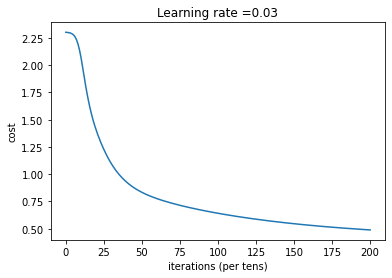

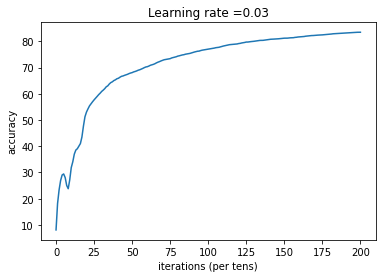

In [28]:
parameters = gradient_descent(parameters, train_x_flatten[:, 0:8000], train_labels_one_hot[:, 0:8000], alpha=0.03, epochs = 2000, print_cost = False)

In [29]:
AL, caches = L_layer_Forward_Prop(test_x_flatten[:, 0:1000], test_labels_one_hot[:, 0:1000], parameters)
cost = compute_cost(AL, test_labels_one_hot[:, 0:1000])
acc = accuracy(AL, test_labels_one_hot[:, 0:1000])
print("cost:",cost)
print("accuracy: ", acc)

cost: 0.5157331909012712
accuracy:  82.6


<h2>Conclusion:</h2><br/>
<font size=2>This network suffers from the vanishing gradients problem at the earlier hidden layers. The more layers I add, the more the training gets prevented soon after it starts, regardless of the size of the training examples or the no of epochs run.<br/><br/>
I changed the activation function from ReLu to leaky ReLu to the vanishing gradients but this did not change anyhting.</font>